Import necessary libraries

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data

In [2]:
data = pd.read_excel('happiness_data.xlsx', engine='openpyxl')

---Data Exploration---

Display the first few rows

In [3]:
data.head()

,Country,Region,Population,GDP,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Czech Republic,Prague,943912.0,52166.98,4.22,0.0270,2639.39,2.9,1.17,0.77,NaN,0.14,1.90
1,Netherlands,Eindhoven,219805.0,14719.80,6.25,0.0472,5446.49,2.7,1.30,0.50,0.58,0.38,NaN
2,Guatemala,Quetzaltenango,2317113.0,67047.70,4.68,NaN,2501.85,3.1,1.20,0.86,NaN,0.31,3.15
3,Mongolia,Ulaanbaatar,2064301.0,39090.80,7.15,0.0509,20708.62,2.7,1.25,NaN,0.24,0.22,1.64
4,Libya,Tripoli,1882427.0,NaN,5.27,0.0617,4071.17,2.4,1.24,0.82,0.51,0.13,2.58


Basic statistics

In [4]:
data.describe()

,Population,GDP,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,1.910600e+04,19106.000000,19106.000000,19106.000000,19106.000000,19106.000000,19106.000000,19106.000000,19106.000000,19106.000000,19106.000000
mean,2.510684e+06,35658.590094,5.499719,0.044988,12124.803989,2.599607,1.148661,0.725178,0.398810,0.300084,2.353119
std,1.440455e+06,19979.456613,1.437166,0.014435,6869.756571,0.408744,0.145353,0.130241,0.172011,0.115489,0.493295
min,1.007900e+04,1003.410000,3.000000,0.020000,202.010000,1.900000,0.900000,0.500000,0.100000,0.100000,1.500000
25%,1.250496e+06,18206.032500,4.270000,0.032500,6152.335000,2.200000,1.020000,0.610000,0.250000,0.200000,1.920000
50%,2.520624e+06,35537.295000,5.500000,0.045000,12068.035000,2.600000,1.150000,0.730000,0.400000,0.300000,2.360000
75%,3.757405e+06,52993.050000,6.740000,0.057500,18071.650000,3.000000,1.270000,0.840000,0.550000,0.400000,2.780000
max,4.998718e+06,69997.880000,8.000000,0.070000,23999.690000,3.300000,1.400000,0.950000,0.700000,0.500000,3.200000


---Visualization---

Distribution of Happiness Score

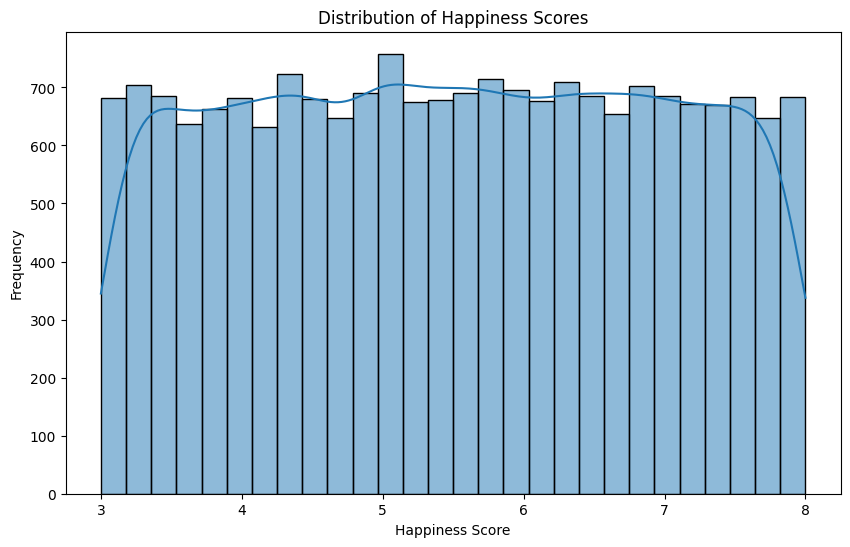

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Happiness Score'], kde=True)
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

Correlation matrix

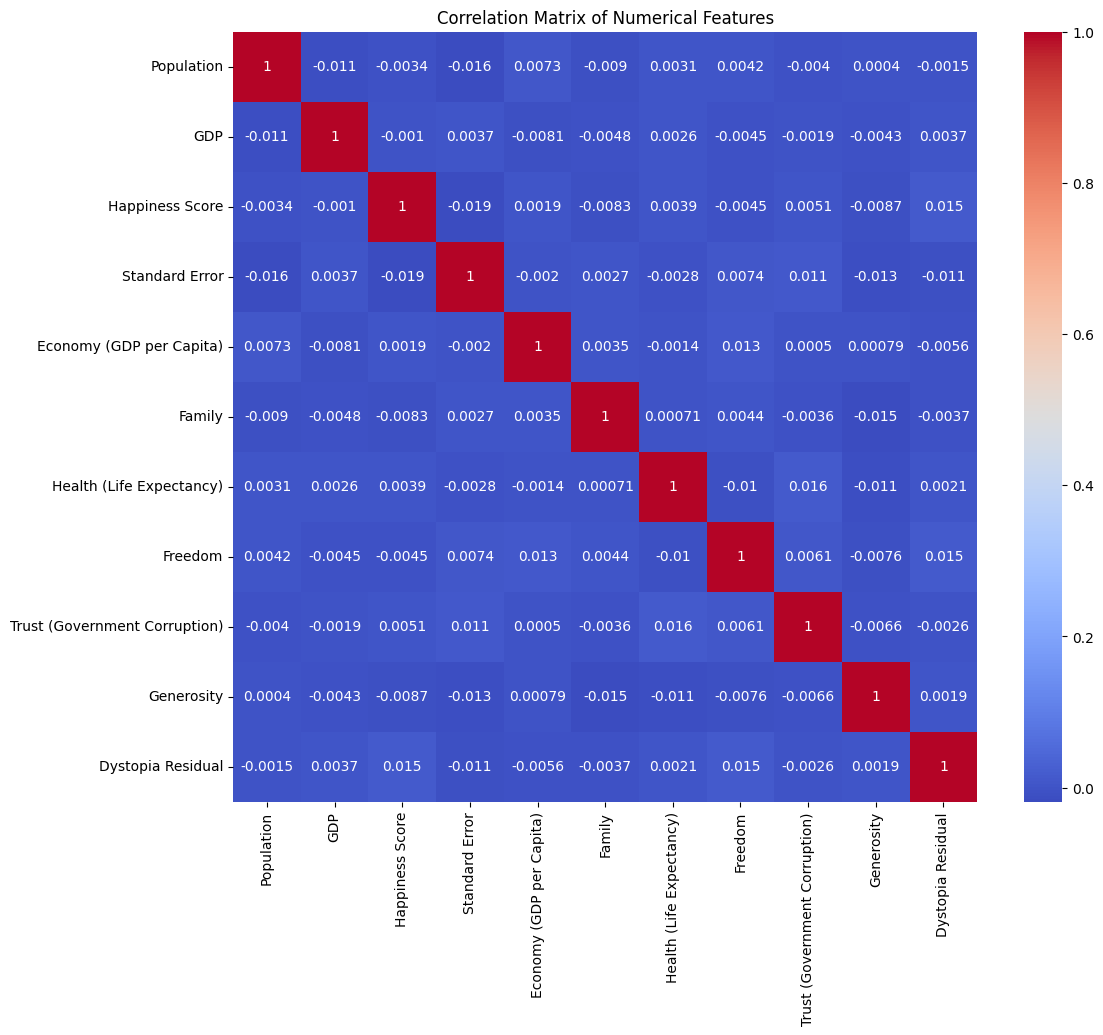

In [6]:
num_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
correlation_matrix = num_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

---Preprocessing---

Handling missing values

In [8]:
num_cols = num_data.columns
num_imputer = SimpleImputer(strategy='median')
data[num_cols] = num_imputer.fit_transform(data[num_cols])

cat_cols = data.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

Handling outliers using z-score

In [9]:
z_scores = np.abs((data[num_cols] - data[num_cols].mean()) / data[num_cols].std())
for col in num_cols:
    outliers = z_scores[col] > 3
    data.loc[outliers, col] = data[col].median()

Feature Scaling

In [10]:
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

---Categorical Encoding---

In [11]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_cat_cols = one_hot_encoder.fit_transform(data[cat_cols])
encoded_cat_df = pd.DataFrame(encoded_cat_cols, columns=one_hot_encoder.get_feature_names_out(cat_cols))

Concatenate encoded categorical data

In [12]:
data = pd.concat([data.drop(cat_cols, axis=1), encoded_cat_df], axis=1)

---Experimenting with Attribute Combinations---

In [13]:
data['GDP per Population'] = data['GDP'] / data['Population']
data['Family + Health'] = data['Family'] + data['Health (Life Expectancy)']

---Dimensionality Reduction---

In [14]:
pca = PCA(n_components=0.95)
reduced_data = pca.fit_transform(data)
data = pd.DataFrame(reduced_data)

Save the cleaned data

In [15]:
data.to_csv('final_cleaned_happiness_data.csv', index=False)

In [16]:
data.shape

(22478, 1)